In [ ]:
# mog, grabcut, frame differencing

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

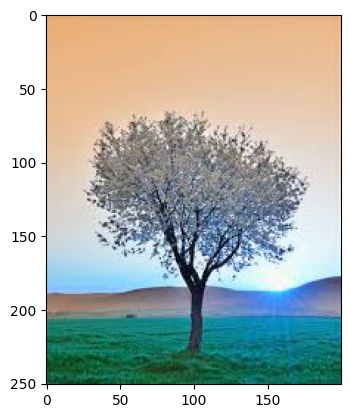

In [ ]:
image = cv2.imread(r"C:\Users\HP\OneDrive\Documents\Desktop\cv9\groot.jpg")
plt.imshow(image)
image = cv2.resize(image, (1000, 1000))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [ ]:
mask = np.zeros(image.shape[0:2], np.uint8)
bgdmodel = np.zeros((1, 65), np.float64)
fgdmodel = np.zeros((1, 65), np.float64)

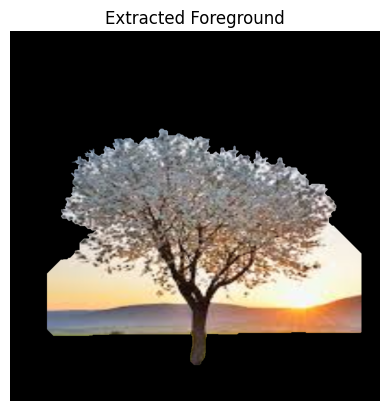

In [ ]:
# Apply GrabCut algorithm
cv2.grabCut(image_rgb, mask, (100, 30, image_rgb.shape[1]-150, image_rgb.shape[0]-70),
            bgdmodel, fgdmodel, 10, cv2.GC_INIT_WITH_RECT)

# Refine the mask (make foreground pixels 1, sure background 0, uncertain - 2, and sure background 0)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')  # Convert uncertain and background to 0, and foreground to 1

# Show the output
# plt.imshow(mask2, cmap='gray')
# plt.title("GrabCut Mask (Foreground and Background)")
# plt.axis('off')  # Turn off axis labels
# plt.show()

# Optionally, extract the foreground
foreground = image_rgb * mask2[:, :, np.newaxis]

# Display the extracted foreground
plt.imshow(foreground)
plt.title("Extracted Foreground")
plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np

# Open the video
cap = cv2.VideoCapture(r"C:\Users\HP\OneDrive\Documents\Desktop\cv9\video2.mp4")

# Check if the video was opened correctly
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Create the background subtractor using MOG2
bg_subtractor = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()  # Read a frame from the video
    if not ret:
        break  # Exit if no frame is read (end of video)

    # Apply the background subtractor to the frame
    fg_mask = bg_subtractor.apply(frame)

    # Optionally, you can also refine the mask with a morphological operation to reduce noise
    kernel = np.ones((5, 5), np.uint8)
    fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)

    # Apply the mask to extract the foreground
    foreground = cv2.bitwise_and(frame, frame, mask=fg_mask)

    # Display the original frame and the foreground (with the background removed)
    cv2.imshow('Original Frame', frame)
    cv2.imshow('Foreground', foreground)

    # Press 'q' to quit the loop
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
#cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

# Open the video
cap = cv2.VideoCapture(r"C:\Users\HP\OneDrive\Documents\Desktop\cv9\video2.mp4")

# Check if the video was opened correctly
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Read the first frame
ret, prev_frame = cap.read()
if not ret:
    print("Error: Could not read video frame.")
    exit()

# Convert the first frame to grayscale
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

while True:
    # Read the next frame
    ret, frame = cap.read()
    if not ret:
        break  # Exit if no frame is read (end of video)

    # Convert the current frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the current and previous frame
    frame_diff = cv2.absdiff(prev_gray, gray)

    # Apply thresholding to highlight the differences (foreground)
    _, thresholded_diff = cv2.threshold(frame_diff, 25, 255, cv2.THRESH_BINARY)

    # Optionally, you can refine the mask with morphological operations
    kernel = np.ones((5, 5), np.uint8)
    thresholded_diff = cv2.morphologyEx(thresholded_diff, cv2.MORPH_OPEN, kernel)

    # Display the original frame and the thresholded difference mask
    cv2.imshow('Original Frame', frame)
    cv2.imshow('Frame Difference', thresholded_diff)

    # Prepare for the next iteration (set the current frame as the previous frame)
    prev_gray = gray

    # Press 'q' to quit the loop
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
#cv2.destroyAllWindows()
